In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\asus\Downloads\NLP\SPAM text message 20170820 - Data.csv")
df.head(20) 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Ham here denotes the the non spam messages

In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Checking the null values

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
x = df["Category"].value_counts()
x

ham     4825
spam     747
Name: Category, dtype: int64

# Pie plot

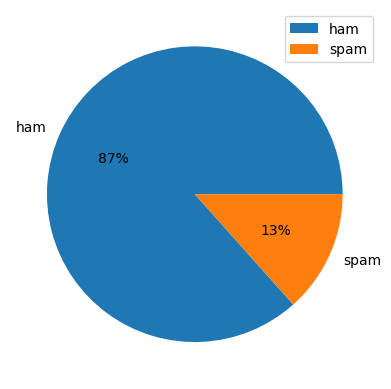

In [7]:
import matplotlib.pyplot as plt
labels = ["ham", "spam"]
# size = [4825,747]
plt.pie(x, labels=labels, autopct='%1.0f%%')
plt.legend()
plt.show()

* Here we have calculated the total words in each rows
* In second line of code we have calculated the characters in each row excluding the space by using the .replace function.


In [8]:
df["Total Words"] = df["Message"].apply(lambda x: len(x.split(" ")))


df['Total Chars'] = df['Message'].apply(lambda x: len(x.replace(" ", "")))


In [9]:
df

,Category,Message,Total Words,Total Chars
0,ham,"Go until jurong point, crazy.. Available only ...",20,92
1,ham,Ok lar... Joking wif u oni...,6,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128
3,ham,U dun say so early hor... U c already then say...,11,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,49
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,131
5568,ham,Will ü b going to esplanade fr home?,8,29
5569,ham,"Pity, * was in mood for that. So...any other s...",10,48
5570,ham,The guy did some bitching but I acted like i'd...,26,100


# Text Preprocessing
## Convert the text into lower case 



In [10]:
df["Message"] = df["Message"].apply(lambda x: x.lower())

In [11]:
df.head(10)

,Category,Message,Total Words,Total Chars
0,ham,"go until jurong point, crazy.. available only ...",20,92
1,ham,ok lar... joking wif u oni...,6,24
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,128
3,ham,u dun say so early hor... u c already then say...,11,39
4,ham,"nah i don't think he goes to usf, he lives aro...",13,49
5,spam,freemsg hey there darling it's been 3 week's n...,32,116
6,ham,even my brother is not like to speak with me. ...,16,62
7,ham,as per your request 'melle melle (oru minnamin...,26,135
8,spam,winner!! as a valued network customer you have...,26,132
9,spam,had your mobile 11 months or more? u r entitle...,29,126


## Removing the URLs

In [12]:
import re
df["Message"] = df["Message"].apply(lambda x : re.sub(r"http\S+", "", x))

#

# Removing the punctuation
* Note- **maketrans(x, y, z)** takes 3 arguements  
* x - string of character to be replaced
* y - string of character to replace them with
* z - string of charcter to be deleted

In [13]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df["Message"] = df["Message"].apply(remove_punctuation)

In [14]:
df

,Category,Message,Total Words,Total Chars
0,ham,go until jurong point crazy available only in ...,20,92
1,ham,ok lar joking wif u oni,6,24
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,128
3,ham,u dun say so early hor u c already then say,11,39
4,ham,nah i dont think he goes to usf he lives aroun...,13,49
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,30,131
5568,ham,will ü b going to esplanade fr home,8,29
5569,ham,pity was in mood for that soany other suggest...,10,48
5570,ham,the guy did some bitching but i acted like id ...,26,100



# Applying Stemmization
*  Stemming is a technique used to extract the base form of the words by removing affixes from them



In [15]:
from nltk.stem import PorterStemmer

import nltk
ps = PorterStemmer()
def stemmize_text(text):
    words = nltk.word_tokenize(text)
    stemmized_words = [ps.stem(word) for word in words]
    joined_text = " ".join(stemmized_words)
    return joined_text
    
df["Message"] = df["Message"].apply(stemmize_text)



In [16]:
df['Total Words After Transformation'] = df['Message'].apply(lambda x: np.log(len(x.split())))

# Finding Most common words

In [17]:
from collections import Counter



Counter(" ".join(df["Message"]).split()).most_common(50)

pd.Series(" ".join(df["Message"]).split()).value_counts()[:50]

i       2250
to      2248
you     2129
a       1442
the     1330
u       1131
and      971
it       934
is       892
in       886
me       802
my       758
your     753
for      710
call     652
of       620
have     615
that     612
on       536
are      490
do       486
2        482
now      478
im       465
go       452
get      447
not      441
so       440
but      433
be       429
or       418
can      411
at       405
ur       390
will     389
if       383
with     382
just     366
we       350
no       337
thi      329
how      309
up       307
come     300
what     295
4        293
when     290
dont     287
from     278
ok       278
dtype: int64

In [18]:
spam = df.query("Category == 'spam'")["Message"]
ham = df.query("Category == 'ham'")["Message"]
top_50_spam_words = spam.str.split(expand = True).stack().value_counts().head(50)
top_50_ham_words = ham.str.split(expand = True).stack().value_counts().head(50)

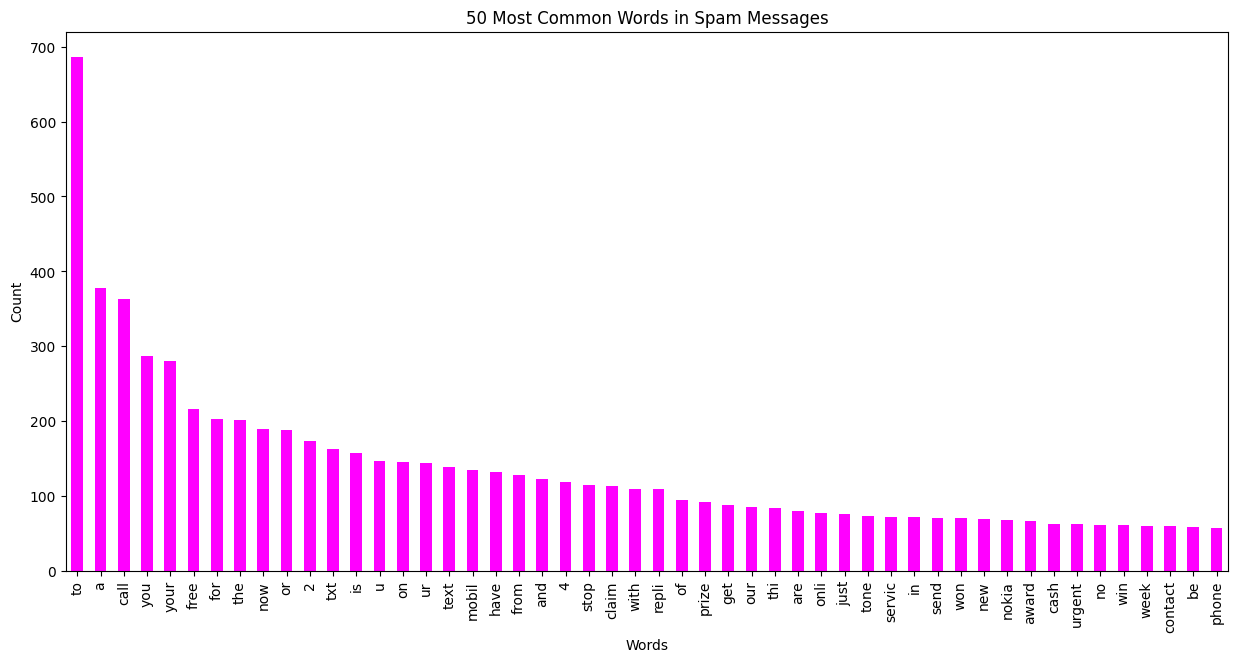

In [19]:
import matplotlib.pyplot as plt

top_50_spam_words.plot(kind='bar', figsize=(15,7),color = "magenta" )
plt.title('50 Most Common Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

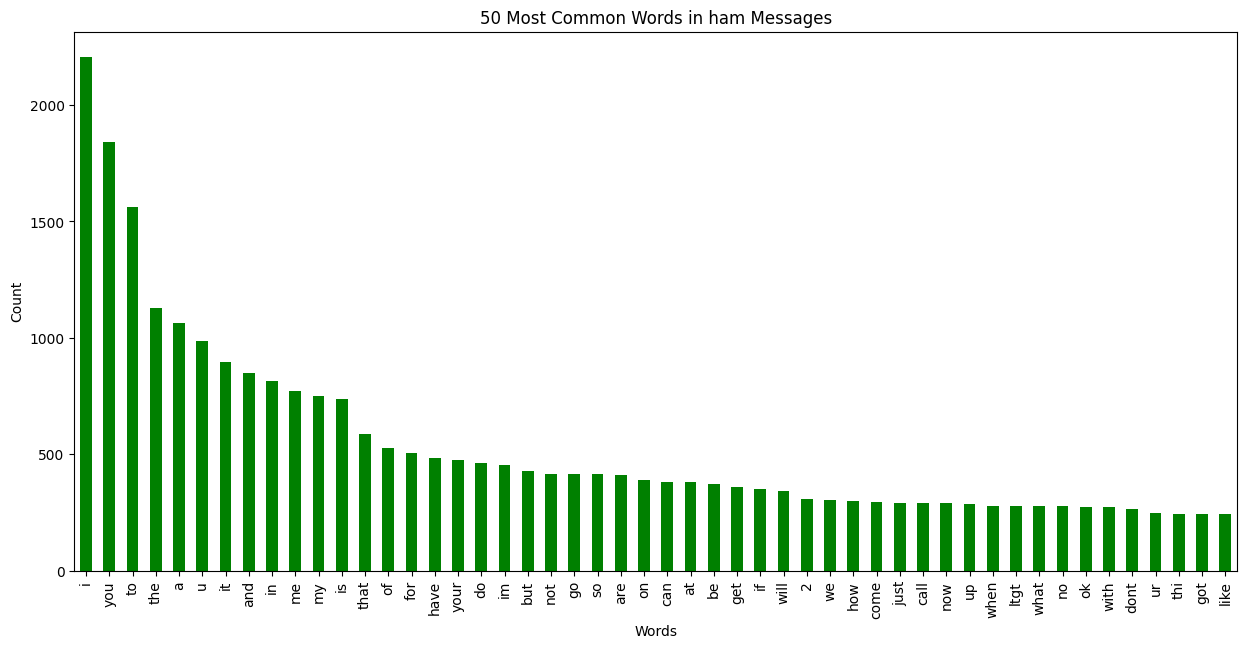

In [20]:
top_50_ham_words.plot(kind='bar', figsize=(15,7), color = "green")
plt.title('50 Most Common Words in ham Messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [21]:
X = df["Message"]
df["Category"] = df["Category"].replace({"spam": 0, "ham": 1})
y = df["Category"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)


# Term Frequency Inverse Document Frequency (TFIDF) :
* TFIDF works by proportionally increasing the number of times a word appears in the document but is counterbalanced by the number of documents in which it is present. Hence, words like ‘this’, ’are’ etc., that are commonly present in all the documents are not given a very high rank. However, a word that is present too many times in a few of the documents will be given a higher rank as it might be indicative of the context of the document.

## Term Frequency:

* Term frequency is defined as the number of times a word (i) appears in a document (j) divided by the total number of words in the document.

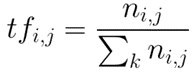

## Inverse Document Frequency:

* Inverse document frequency refers to the log of the total number of documents divided by the number of documents that contain the word. The logarithm is added to dampen the importance of a very high value of IDF.
log of idf

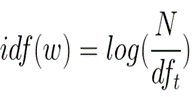

*TFIDF is computed by multiplying the term frequency with the inverse document frequency.

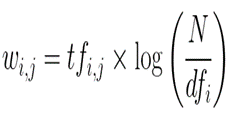

Let us now see an illustration of TFIDF in the following sentences, that we refer to as documents.

Document 1: Text processing is necessary.

Document 2: Text processing is necessary and important.

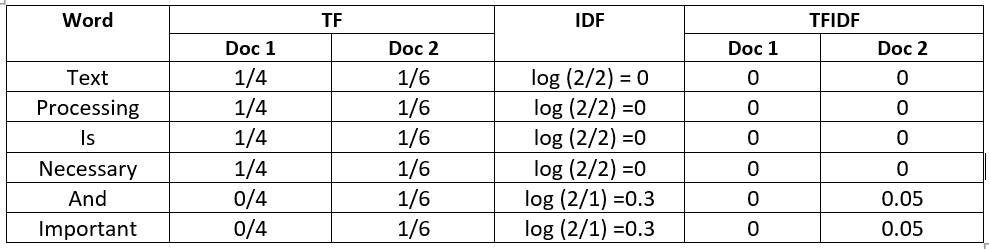

The above table shows how the TFIDF of some words are zero and some words are non-zero depending on their frequency in the document and across all documents.

The limitation of TFIDF is again that this vectorization doesn’t help in bringing in the contextual meaning of the words as it is just based on the frequency.
#### Source: https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/



# TFIDF using Count Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()


In [23]:
from sklearn.metrics import classification_report, accuracy_score

# Support Vector Machine

In [24]:
from sklearn import svm
svm = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
accuracy_score(y_test, svm_y_pred)



0.9856424982053122

In [25]:
print(f" The Accuracy score using Support Vector Machine is {(round(accuracy_score(y_test, svm_y_pred), 4)) * 100}%")
print(f"The Classification report\n{classification_report(y_test, svm_y_pred)}")

 The Accuracy score using Support Vector Machine is 98.56%
The Classification report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       185
           1       0.99      1.00      0.99      1208

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



# Random Forest Classification

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [27]:
y_pred = rf.predict(X_test)

In [28]:
print(f"The Accuracy score using Random Forest is {(round(accuracy_score(y_test, y_pred), 4)) * 100}%")


The Accuracy score using Random Forest is 98.06%


In [29]:
print(f"The Classification report\n{classification_report(y_test, y_pred)}")

The Classification report
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       185
           1       0.98      1.00      0.99      1208

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393

